## Code to make Fig 3
Elena Savidge
<br>
3 Aug 2023

In [89]:
# import rasterio
# from rasterio.plot import show
import matplotlib.pyplot as plt
import cartopy
#import rioxarray as rxr
import xarray as xr
import cmocean
from pyhdf.SD import SD, SDC
import cartopy.crs as ccrs
import pandas as pd
import numpy as np
import pyproj
from pyproj import Proj, transform, CRS
# import rasterio as rio
# from rasterio.plot import show
from glob import glob
from matplotlib.collections import PatchCollection
from shapely.geometry import Point, Polygon
import geopandas as gpd
import scipy
from scipy import ndimage
from cartopy.geodesic import Geodesic
import datetime
from scipy.signal import savgol_filter

In [90]:
# NOTE: need dir to be set up this way for pyproj to work
pyproj.datadir.set_data_dir('/opt/anaconda3/envs/sealenv/share/proj') 

/opt/anaconda3/envs/polyarea/lib/python3.11/site-packages/pyproj/datadir.py:38: UserWarning: pyproj unable to set database path.
  _global_context_set_data_dir()


In [91]:
pwd

'/Users/elenasavidge/Documents/Documents - Elena’s MacBook Pro/PhD_Ch2/manuscriptcode_2'

## Read in data

In [92]:
#thermal = pd.read_pickle('thermal_area_effectivepixel.pkl') # don't need thermal for this fig b/c not in intervals of interest
#vis = pd.read_pickle('visible_area_effectivepixel_fixed')  #doesnt matter if save .pkl or not
vis = pd.read_pickle('visible_area_effectivepixel_fixed_v2')  

### a. 2000-2001

In [93]:
# contrain dates
df2000_2001 = vis[(vis['Date']>='2000-6-1') & (vis['Date']<'2001-6-1')]

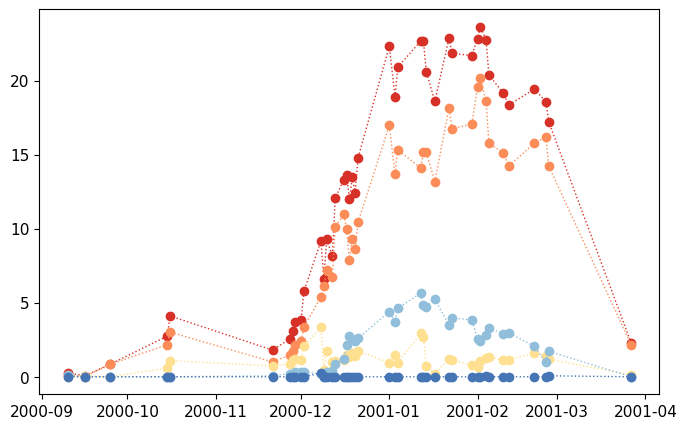

In [94]:
# will need to save compiled df as pickle file after happy w algorithm so that don't need to rerun (so long)

# Example fig

plt.figure(figsize=(8,5))
plt.plot(df2000_2001['Date'],df2000_2001['total'], 'o:',label='total',c='#d73027',linewidth= 1, markersize = 6)
plt.plot(df2000_2001['Date'],df2000_2001['east'], 'o:',label='east', c = '#fc8d59',linewidth= 1, markersize = 6)
plt.plot(df2000_2001['Date'],df2000_2001['west'], 'o:',label='west',c = '#fee090',linewidth= 1, markersize = 6)
plt.plot(df2000_2001['Date'],df2000_2001['mid'], 'o:',label='mid',c='#91bfdb',linewidth= 1, markersize = 6)
plt.plot(df2000_2001['Date'],df2000_2001['other'], 'o:',label='other (offshore)',c ='#4575b4',linewidth= 1, markersize = 6) # this will be closely linked to calving!!!!
#plt.ylabel('Polynya area [$\mathregular{km^{2}}$]',fontsize=12)#,plt.xlabel('Date',fontsize=15)
#plt.legend(fontsize=10,loc='best')
plt.yticks(fontsize=11);plt.xticks(fontsize=11)
#plt.xticks(rotation=45, ha='right',fontsize=12)
#plt.ylim([-1,10])
#plt.gca().invert_xaxis()
#plt.savefig('int0001_green.png', format='png', dpi=400)

plt.show()

In [95]:
# check chnage in area from subsequent total rows
df2000_2001['change']= (df2000_2001['total']-df2000_2001['total'].shift()) #km/2

# Need to convert time delta column to integers for any subsequent calc
df2000_2001['days'] = df2000_2001['time_diff'].dt.days

# Get rate (km2/day) of change between measurements
df2000_2001['change_rate']= (df2000_2001['change']/df2000_2001['days']) #km2/day

# sort by ascending date
df2000_2001.sort_values(by='Date').head() 

/var/folders/89/l74gfpqj40z09y2mj3f1sw6h0000gn/T/ipykernel_58767/2069952474.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2000_2001['change']= (df2000_2001['total']-df2000_2001['total'].shift()) #km/2
/var/folders/89/l74gfpqj40z09y2mj3f1sw6h0000gn/T/ipykernel_58767/2069952474.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2000_2001['days'] = df2000_2001['time_diff'].dt.days
/var/folders/89/l74gfpqj40z09y2mj3f1sw6h0000gn/T/ipykernel_58767/2069952474.py:8: SettingWithCopyWarning: 
A value is tr

,index,west,east,mid,other,total,uwest,ueast,umid,uother,...,lmid,lother,ltotal,pixelwidth,pixelheight,Date,time_diff,change,days,change_rate
265,0,0.000000,0.136900,0.1369,0.0,0.273800,0.000000,0.273800,0.273800,0.000000,...,0.0,0.0,0.068450,0.274829,0.249064,2000-09-10,-6 days,0.208991,-6,-0.034832
264,0,0.064809,0.000000,0.0000,0.0,0.064809,0.324044,0.518471,0.129618,0.000000,...,0.0,0.0,0.064809,0.260090,0.249178,2000-09-16,-9 days,-0.788174,-9,0.087575
263,0,0.000000,0.852983,0.0000,0.0,0.852983,0.000000,0.959605,0.106623,0.213246,...,0.0,0.0,0.533114,0.432803,0.246354,2000-09-25,-20 days,-1.894537,-20,0.094727
262,0,0.582807,2.164712,0.0000,0.0,2.747520,1.165614,2.331229,0.083258,2.414487,...,0.0,0.0,1.914938,0.337433,0.246740,2000-10-15,-1 days,-1.361092,-1,1.361092
261,0,1.091350,3.017262,0.0000,0.0,4.108612,1.348138,3.530838,0.128394,26.064006,...,0.0,0.0,3.081459,0.257811,0.249008,2000-10-16,-36 days,2.307609,-36,-0.064100


In [96]:
# calc average change per day by taking mean change rate column (which is in km2/day units)
rate00_01 = np.mean(np.abs(df2000_2001['change_rate'])) 
rate00_01

0.9437798898969645

In [97]:
#df2003_2004.count()

In [98]:
# find row of max value of total area within interval
max_0001 = df2000_2001.query('total == total.max()')  # max in feb
max_0001

,index,west,east,mid,other,total,uwest,ueast,umid,uother,...,lmid,lother,ltotal,pixelwidth,pixelheight,Date,time_diff,change,days,change_rate
232,0,1.032214,20.175095,2.439779,3.552714e-15,23.647088,1.407565,22.145686,3.284318,0.093838,...,1.970591,0.0,21.676498,0.37839,0.247992,2001-02-02,-2 days,0.901624,-2,-0.450812


In [99]:
growth0001 = df2000_2001[df2000_2001['Date']<= max_0001['Date'].iloc[0]]  # grows before max
close0001 = df2000_2001[df2000_2001['Date']>= max_0001['Date'].iloc[0]]   # closes after max

In [100]:
# growth time
growtime0001 = growth0001['Date'].max() - growth0001['Date'].min() 
growtime0001

Timedelta('145 days 00:00:00')

In [101]:
# close time
closetime0001 = close0001['Date'].max() - close0001['Date'].min() 
closetime0001

Timedelta('53 days 00:00:00')

In [102]:
# avg growth rate
growthrate0001 = (growth0001['total'].head(1).iloc[0]-growth0001['total'].tail(1).iloc[0])/145
growthrate0001

0.16119509346472372

### a. 2003-2004

In [104]:
# contrain dates
df2003_2004 = vis[(vis['Date']>='2003-6-1') & (vis['Date']<'2004-6-1')]

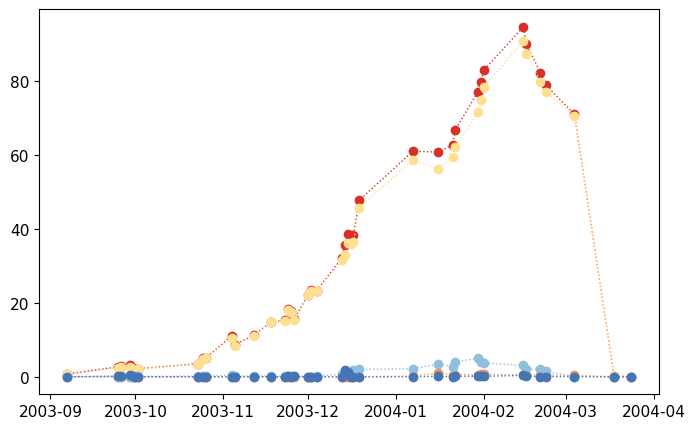

In [105]:
# will need to save compiled df as pickle file after happy w algorithm so that don't need to rerun (so long)

# Example fig

plt.figure(figsize=(8,5))
plt.plot(df2003_2004['Date'],df2003_2004['total'], 'o:',label='total',c='#d73027',linewidth= 1, markersize = 6)
plt.plot(df2003_2004['Date'],df2003_2004['east'], 'o:',label='east', c = '#fc8d59',linewidth= 1, markersize = 6)
plt.plot(df2003_2004['Date'],df2003_2004['west'], 'o:',label='west',c = '#fee090',linewidth= 1, markersize = 6)
plt.plot(df2003_2004['Date'],df2003_2004['mid'], 'o:',label='mid',c='#91bfdb',linewidth= 1, markersize = 6)
plt.plot(df2003_2004['Date'],df2003_2004['other'], 'o:',label='other (offshore)',c ='#4575b4',linewidth= 1, markersize = 6) # this will be closely linked to calving!!!!
#plt.ylabel('Polynya area [$\mathregular{km^{2}}$]',fontsize=12)#,plt.xlabel('Date',fontsize=15)
#plt.legend(fontsize=10,loc='best')
plt.yticks(fontsize=11);plt.xticks(fontsize=11)
#plt.xticks(rotation=45, ha='right',fontsize=12)
#plt.ylim([-1,10])
#plt.gca().invert_xaxis()
#plt.savefig('int0304_green.png', format='png', dpi=400)

plt.show()

In [106]:
# check chnage in area from subsequent total rows
df2003_2004['change']= (df2003_2004['total']-df2003_2004['total'].shift()) #km/2

# Need to convert time delta column to integers for any subsequent calc
df2003_2004['days'] = df2003_2004['time_diff'].dt.days

# Get rate (km2/day) of change between measurements
df2003_2004['change_rate']= (df2003_2004['change']/df2003_2004['days']) #km2/day

# sort by ascending date
df2003_2004.sort_values(by='Date').head() 

/var/folders/89/l74gfpqj40z09y2mj3f1sw6h0000gn/T/ipykernel_58767/3363161120.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2003_2004['change']= (df2003_2004['total']-df2003_2004['total'].shift()) #km/2
/var/folders/89/l74gfpqj40z09y2mj3f1sw6h0000gn/T/ipykernel_58767/3363161120.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2003_2004['days'] = df2003_2004['time_diff'].dt.days
/var/folders/89/l74gfpqj40z09y2mj3f1sw6h0000gn/T/ipykernel_58767/3363161120.py:8: SettingWithCopyWarning: 
A value is tr

,index,west,east,mid,other,total,uwest,ueast,umid,uother,...,lmid,lother,ltotal,pixelwidth,pixelheight,Date,time_diff,change,days,change_rate
221,0,0.773397,0.0,0.000000,0.000000,0.773397,0.902297,0.128900,0.000000,0.644498,...,0.0,0.0,0.644498,0.530887,0.242800,2003-09-07,-18 days,-1.934710,-18,0.107484
220,0,2.450193,0.0,0.064479,0.193436,2.708108,2.772586,0.644788,0.128958,1.031660,...,0.0,0.0,2.256756,0.259552,0.248423,2003-09-25,-1 days,-0.214819,-1,0.214819
219,0,2.723637,0.0,0.000000,0.199290,2.922927,3.122218,0.000000,0.066430,1.926475,...,0.0,0.0,2.457916,0.266435,0.249329,2003-09-26,-3 days,-0.201186,-3,0.067062
218,0,2.638140,0.0,0.000000,0.485973,3.124113,3.054688,0.694247,0.138849,1.041371,...,0.0,0.0,2.291016,0.279590,0.248309,2003-09-29,-1 days,0.814118,-1,-0.814118
217,0,1.989162,0.0,0.064167,0.256666,2.309995,2.759160,0.000000,0.064167,1.668329,...,0.0,0.0,1.732496,0.257899,0.248805,2003-09-30,-1 days,0.490706,-1,-0.490706


In [107]:
# calc average change per day by taking mean change rate column (which is in km2/day units)
rate03_04 = np.mean(np.abs(df2003_2004['change_rate'])) 
rate03_04

1.4256665198917888

In [108]:
#df2003_2004.count()

In [109]:
# find row of max value of total area within interval
max_0304 = df2003_2004.query('total == total.max()')  # max in feb
max_0304

,index,west,east,mid,other,total,uwest,ueast,umid,uother,...,lmid,lother,ltotal,pixelwidth,pixelheight,Date,time_diff,change,days,change_rate
187,0,90.773808,0.484311,3.113431,0.345937,94.717487,92.503492,0.761061,3.943679,0.345937,...,2.490745,0.069187,90.566246,0.278684,0.248264,2004-02-15,-1 days,4.631884,-1,-4.631884


In [110]:
growth0304 = df2003_2004[df2003_2004['Date']<= max_0304['Date'].iloc[0]]  # grows before max
close0304 = df2003_2004[df2003_2004['Date']>= max_0304['Date'].iloc[0]]   # closes after max

In [111]:
# growth time
growtime0304 = growth0304['Date'].max() - growth0304['Date'].min() 
growtime0304

Timedelta('161 days 00:00:00')

In [112]:
# close time
closetime0304 = close0304['Date'].max() - close0304['Date'].min() 
closetime0304

Timedelta('38 days 00:00:00')

In [113]:
# avg growth rate 
growthrate0304 = (growth0304['total'].head(1).iloc[0]-growth0304['total'].tail(1).iloc[0])/161
growthrate0304

0.583503665188908

### b. 2004-2005

In [116]:
# contrain dates
# having thermalvis instead of vis makes it weird, but focused on visible anyway for these intervals
df2004_2005 = vis[(vis['Date']>='2004-6-1') & (vis['Date']<'2005-6-1')]

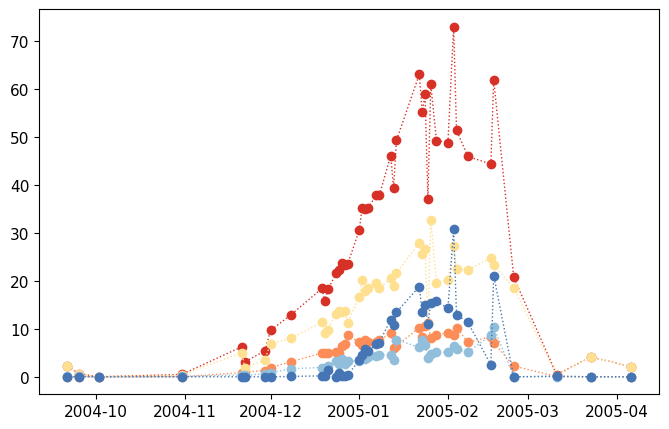

In [117]:
# will need to save compiled df as pickle file after happy w algorithm so that don't need to rerun (so long)

# Example fig

plt.figure(figsize=(8,5))
plt.plot(df2004_2005['Date'],df2004_2005['total'], 'o:',label='total',c='#d73027',linewidth= 1, markersize = 6)
plt.plot(df2004_2005['Date'],df2004_2005['east'], 'o:',label='east', c = '#fc8d59',linewidth= 1, markersize = 6)
plt.plot(df2004_2005['Date'],df2004_2005['west'], 'o:',label='west',c = '#fee090',linewidth= 1, markersize = 6)
plt.plot(df2004_2005['Date'],df2004_2005['mid'], 'o:',label='mid',c='#91bfdb',linewidth= 1, markersize = 6)
plt.plot(df2004_2005['Date'],df2004_2005['other'], 'o:',label='other (offshore)',c ='#4575b4',linewidth= 1, markersize = 6) # this will be closely linked to calving!!!!
#plt.ylabel('Polynya area [$\mathregular{km^{2}}$]',fontsize=12)#,plt.xlabel('Date',fontsize=15)
#plt.legend(fontsize=10,loc='best')
plt.yticks(fontsize=11);plt.xticks(fontsize=11)
#plt.xticks(rotation=45, ha='right',fontsize=12)
#plt.ylim([-1,10])
#plt.gca().invert_xaxis()
#plt.savefig('int0405_green.png', format='png', dpi=400)

plt.show()

In [118]:
# check chnage in area from subsequent total rows
df2004_2005['change']= (df2004_2005['total']-df2004_2005['total'].shift()) #km/2

# Need to convert time delta column to integers for any subsequent calc
df2004_2005['days'] = df2004_2005['time_diff'].dt.days

# Get rate (km2/day) of change between measurements
df2004_2005['change_rate']= (df2004_2005['change']/df2004_2005['days']) #km2/day

# sort by ascending date
df2004_2005.sort_values(by='Date').head() 

/var/folders/89/l74gfpqj40z09y2mj3f1sw6h0000gn/T/ipykernel_58767/1176548444.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2004_2005['change']= (df2004_2005['total']-df2004_2005['total'].shift()) #km/2
/var/folders/89/l74gfpqj40z09y2mj3f1sw6h0000gn/T/ipykernel_58767/1176548444.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2004_2005['days'] = df2004_2005['time_diff'].dt.days
/var/folders/89/l74gfpqj40z09y2mj3f1sw6h0000gn/T/ipykernel_58767/1176548444.py:8: SettingWithCopyWarning: 
A value is tr

,index,west,east,mid,other,total,uwest,ueast,umid,uother,...,lmid,lother,ltotal,pixelwidth,pixelheight,Date,time_diff,change,days,change_rate
180,0,2.158066,0.000000,0.130792,0.000000e+00,2.288858,3.662173,0.000000,0.196188,1.896482e+00,...,0.065396,0.0,1.700295,0.262066,0.249540,2004-09-21,-4 days,1.644216,-4,-0.411054
179,0,0.515713,0.000000,0.128928,0.000000e+00,0.644642,0.838034,0.000000,0.128928,0.000000e+00,...,0.000000,0.0,0.000000,0.259597,0.248324,2004-09-25,-7 days,0.644642,-7,-0.092092
178,0,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,...,0.000000,0.0,0.000000,0.536303,0.249337,2004-10-02,-29 days,-0.491434,-29,0.016946
177,0,0.421229,0.000000,0.070205,0.000000e+00,0.491434,1.684915,0.070205,0.140410,-2.220446e-16,...,0.000000,0.0,0.000000,0.283046,0.248033,2004-10-31,-21 days,-5.776107,-21,0.275053
176,0,5.027089,0.848729,0.391721,8.881784e-16,6.267540,6.528688,1.305738,0.391721,1.305738e-01,...,0.261148,0.0,4.831229,0.262709,0.248514,2004-11-21,-1 days,3.142722,-1,-3.142722


In [119]:
# calc average change per day by taking mean change rate column (which is in km2/day units)
rate04_05 = np.mean(np.abs(df2004_2005['change_rate'])) 
rate04_05

4.105317622728596

In [120]:
#df2004_2005.count()

In [121]:
# find row of max value of total area within interval
max_0405 = df2004_2005.query('total == total.max()')  # max in feb
max_0405

,index,west,east,mid,other,total,uwest,ueast,umid,uother,...,lmid,lother,ltotal,pixelwidth,pixelheight,Date,time_diff,change,days,change_rate
147,0,27.170073,8.657131,6.326365,30.832706,72.986276,31.631826,9.789218,6.992298,162.62088,...,5.793619,10.188778,46.615322,0.266727,0.249669,2005-02-03,-1 days,21.597454,-1,-21.597454


In [122]:
growth0405 = df2004_2005[df2004_2005['Date']<= max_0405['Date'].iloc[0]]  # grows before max
close0405 = df2004_2005[df2004_2005['Date']>= max_0405['Date'].iloc[0]]   # closes after max

In [123]:
# growth time
growtime0405 = growth0405['Date'].max() - growth0405['Date'].min() 
growtime0405

Timedelta('135 days 00:00:00')

In [124]:
# close time
closetime0405 = close0405['Date'].max() - close0405['Date'].min() 
closetime0405

Timedelta('62 days 00:00:00')

In [125]:
# avg growth rate 
growthrate0405 = (growth0405['total'].head(1).iloc[0]-growth0405['total'].tail(1).iloc[0])/135 
growthrate0405

0.52368457416461

### c. 2005-2006

In [127]:
# contrain dates
df2005_2006 = vis[(vis['Date']>='2005-6-1') & (vis['Date']<'2006-6-1')]

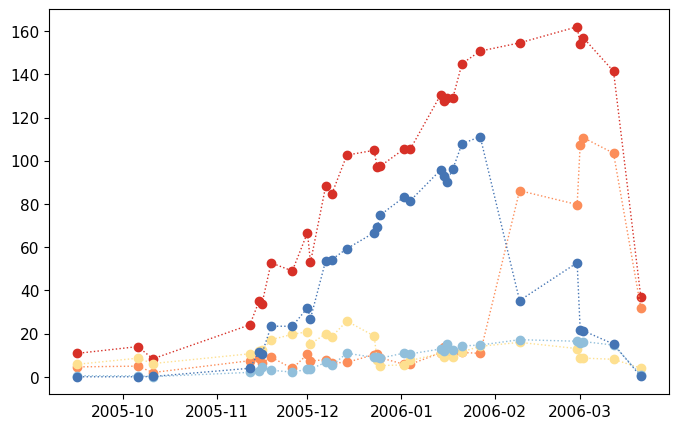

In [128]:
# will need to save compiled df as pickle file after happy w algorithm so that don't need to rerun (so long)

# Example fig

plt.figure(figsize=(8,5))
plt.plot(df2005_2006['Date'],df2005_2006['total'], 'o:',label='total',c='#d73027',linewidth= 1, markersize = 6)
plt.plot(df2005_2006['Date'],df2005_2006['east'], 'o:',label='east', c = '#fc8d59',linewidth= 1, markersize = 6)
plt.plot(df2005_2006['Date'],df2005_2006['west'], 'o:',label='west',c = '#fee090',linewidth= 1, markersize = 6)
plt.plot(df2005_2006['Date'],df2005_2006['mid'], 'o:',label='mid',c='#91bfdb',linewidth= 1, markersize = 6)
plt.plot(df2005_2006['Date'],df2005_2006['other'], 'o:',label='other (offshore)',c ='#4575b4',linewidth= 1, markersize = 6) # this will be closely linked to calving!!!!
#plt.ylabel('Polynya area [$\mathregular{km^{2}}$]',fontsize=12)#,plt.xlabel('Date',fontsize=15)
#plt.legend(fontsize=10,loc='best')
plt.yticks(fontsize=11);plt.xticks(fontsize=11)
#plt.xticks(rotation=45, ha='right',fontsize=12)
#plt.ylim([-1,10])
#plt.gca().invert_xaxis()
#plt.savefig('int0506_green.png', format='png', dpi=400)

plt.show()

In [129]:
# check chnage in area from subsequent total rows
df2005_2006['change']= (df2005_2006['total']-df2005_2006['total'].shift()) #km/2

# Need to convert time delta column to integers for any subsequent calc
df2005_2006['days'] = df2005_2006['time_diff'].dt.days

# Get rate (km2/day) of change between measurements
df2005_2006['change_rate']= (df2005_2006['change']/df2005_2006['days']) #km2/day

# sort by ascending date
df2005_2006.sort_values(by='Date').head() 

/var/folders/89/l74gfpqj40z09y2mj3f1sw6h0000gn/T/ipykernel_58767/130687360.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2005_2006['change']= (df2005_2006['total']-df2005_2006['total'].shift()) #km/2
/var/folders/89/l74gfpqj40z09y2mj3f1sw6h0000gn/T/ipykernel_58767/130687360.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2005_2006['days'] = df2005_2006['time_diff'].dt.days
/var/folders/89/l74gfpqj40z09y2mj3f1sw6h0000gn/T/ipykernel_58767/130687360.py:8: SettingWithCopyWarning: 
A value is tryin

,index,west,east,mid,other,total,uwest,ueast,umid,uother,...,lmid,lother,ltotal,pixelwidth,pixelheight,Date,time_diff,change,days,change_rate
138,0,5.770153,4.573902,0.492574,0.000000,10.836629,6.825669,5.136844,0.703677,0.562942,...,0.351839,0.000000,9.218171,0.283656,0.248074,2005-09-16,-20 days,-3.124976,-20,0.156249
137,0,8.611050,4.932543,0.418012,0.000000,13.961605,10.283099,5.266953,0.418012,0.000000,...,0.083602,0.000000,11.119123,0.340846,0.245279,2005-10-06,-5 days,5.643473,-5,-1.128695
136,0,6.129150,1.970084,0.072966,0.145932,8.318133,7.661438,2.553813,0.218898,0.875593,...,0.000000,0.000000,7.004743,0.294914,0.247414,2005-10-11,-32 days,-15.746271,-32,0.492071
135,0,10.646675,7.438088,2.041828,3.937811,24.064403,13.198961,8.021468,2.625208,6.635942,...,1.677216,2.406440,18.011841,0.294844,0.247326,2005-11-12,-3 days,-10.875988,-3,3.625329
134,0,11.839838,8.558144,2.895613,11.646797,34.940391,13.319818,9.523348,3.088653,13.384165,...,2.573878,10.424205,31.079575,0.259491,0.247973,2005-11-15,-1 days,1.114243,-1,-1.114243


In [130]:
# calc average change per day by taking mean change rate column (which is in km2/day units)
rate05_06 = np.mean(np.abs(df2005_2006['change_rate'])) 
rate05_06

3.14739227012492

In [131]:
#df2005_2006.count()

In [132]:
# find row of max value of total area within interval
max_0506 = df2005_2006.query('total == total.max()')  # max in feb
max_0506

,index,west,east,mid,other,total,uwest,ueast,umid,uother,...,lmid,lother,ltotal,pixelwidth,pixelheight,Date,time_diff,change,days,change_rate
113,0,13.042029,79.729843,16.447091,52.810581,162.029545,14.905176,83.841616,17.475034,57.243586,...,15.097916,48.12059,149.694226,0.257899,0.249114,2006-02-28,-1 days,8.169607,-1,-8.169607


In [133]:
growth0506 = df2005_2006[df2005_2006['Date']<= max_0506['Date'].iloc[0]]  # grows before max
close0506 = df2005_2006[df2005_2006['Date']>= max_0506['Date'].iloc[0]]   # closes after max

In [134]:
# growth time
growtime0506 = growth0506['Date'].max() - growth0506['Date'].min() 
growtime0506

Timedelta('165 days 00:00:00')

In [135]:
# close time
closetime0506 = close0506['Date'].max() - close0506['Date'].min() 
closetime0506

Timedelta('21 days 00:00:00')

In [137]:
# avg growth rate based on 2 large dt
growthrate0506 = (growth0506['total'].head(1).iloc[0]-growth0506['total'].tail(1).iloc[0])/165
growthrate0506

0.9163207009815981

In [139]:
growthrate0001,growthrate0304,growthrate0405,growthrate0506

(0.16119509346472372, 0.583503665188908, 0.52368457416461, 0.9163207009815981)

In [140]:
# mean avg growth rate
(growthrate0001+growthrate0304+growthrate0405+growthrate0506)/4 # in km2/day

0.54617600844996

### d. normalized panel

In [141]:
# make sure ordered by date
df2000_2001 = df2000_2001.sort_values(by='Date') # add
df2003_2004 = df2003_2004.sort_values(by='Date')
df2004_2005 = df2004_2005.sort_values(by='Date')
df2005_2006 = df2005_2006.sort_values(by='Date')

In [142]:
# three dfs: df2003_2004,df2004_2005,df2005_2006

# Normalize

# y axis by max area
df2000_2001['area_norm'] = (df2000_2001.total)/(df2000_2001.total.max()) #add

df2003_2004['area_norm'] = (df2003_2004.total)/(df2003_2004.total.max())

df2004_2005['area_norm'] = (df2004_2005.total)/(df2004_2005.total.max())

df2005_2006['area_norm'] = (df2005_2006.total)/(df2005_2006.total.max())

# x axis by days since open
df2000_2001['days_since_open']= df2000_2001.Date - df2000_2001.Date.iloc[0]
df2000_2001['time_norm'] = np.abs((df2000_2001['days_since_open'])/(df2000_2001['days_since_open'].max()))  #add

df2003_2004['days_since_open']= df2003_2004.Date - df2003_2004.Date.iloc[0]
df2003_2004['time_norm'] = np.abs((df2003_2004['days_since_open'])/(df2003_2004['days_since_open'].max()))

df2004_2005['days_since_open']= df2004_2005.Date - df2004_2005.Date.iloc[0]
df2004_2005['time_norm'] = np.abs((df2004_2005['days_since_open'])/(df2004_2005['days_since_open'].max()))

df2005_2006['days_since_open']= df2005_2006.Date - df2005_2006.Date.iloc[0]
df2005_2006['time_norm'] = (df2005_2006['days_since_open'])/(df2005_2006['days_since_open'].max())

In [166]:
# average all three
norm0001 = df2000_2001[['area_norm','time_norm']]  #add
norm0304 = df2003_2004[['area_norm','time_norm']]
norm0405 = df2004_2005[['area_norm','time_norm']]
norm0506 = df2005_2006[['area_norm','time_norm']]

norm0001.reset_index(inplace=True)  #add
norm0304.reset_index(inplace=True)
norm0405.reset_index(inplace=True)
norm0506.reset_index(inplace=True)

# # og
# norm_concat = pd.concat([norm0304,norm0405,norm0506],axis=1) 
# norm_concat.columns = ['index1','area0304','time0304','index2','area0405','time0405','index3','area0506','time0506']
# norm_concat

# add
norm_concat = pd.concat([norm0001,norm0304,norm0405,norm0506],axis=1) 
norm_concat.columns = ['index1','area0001','time0001','index2','area0304','time0304','index3','area0405','time0405','index4','area0506','time0506']
norm_concat

# #mean  (og)
# # area
# mean_a = pd.DataFrame([norm_concat.area0304,norm_concat.area0405,norm_concat.area0506]).T
# mean_a['meanarea'] = mean_a.mean(axis=1)

# # time
# mean_t = pd.DataFrame([norm_concat.time0304,norm_concat.time0405,norm_concat.time0506]).T
# mean_t['meantime'] = mean_t.mean(axis=1)

# # create new df with both mean cols
# avg_norm = pd.DataFrame([mean_a.meanarea,mean_t.meantime]).T
# avg_norm

# # apply smoothing filter
# avg_norm['smootharea'] = avg_norm.meanarea.rolling(window=6, win_type='gaussian',center=True).mean(std=3)
# avg_norm['smoothtime'] = avg_norm.meantime.rolling(window=6, win_type='gaussian',center=True).mean(std=3)

# avg_norm.head(5)

#mean  (og)
# area
mean_a = pd.DataFrame([norm_concat.area0001,norm_concat.area0304,norm_concat.area0405,norm_concat.area0506]).T
mean_a['meanarea'] = mean_a.mean(axis=1)

# time
mean_t = pd.DataFrame([norm_concat.time0001,norm_concat.time0304,norm_concat.time0405,norm_concat.time0506]).T
mean_t['meantime'] = mean_t.mean(axis=1)

# create new df with both mean cols
avg_norm = pd.DataFrame([mean_a.meanarea,mean_t.meantime]).T
avg_norm

# apply smoothing filter
avg_norm['smootharea'] = avg_norm.meanarea.rolling(window=5, win_type='gaussian',center=True).mean(std=3)
avg_norm['smoothtime'] = avg_norm.meantime.rolling(window=5, win_type='gaussian',center=True).mean(std=3)

avg_norm.head(5)

,meanarea,meantime,smootharea,smoothtime
0,0.029496,0.000000,NaN,NaN
1,0.031583,0.062147,NaN,NaN
2,0.029567,0.090370,0.056767,0.116547
3,0.076106,0.199204,0.070544,0.173564
4,0.124913,0.232405,0.090969,0.223154


(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 [Text(0, -0.2, '−0.2'),
  Text(0, 0.0, '0.0'),
  Text(0, 0.2, '0.2'),
  Text(0, 0.4000000000000001, '0.4'),
  Text(0, 0.6000000000000001, '0.6'),
  Text(0, 0.8, '0.8'),
  Text(0, 1.0000000000000002, '1.0'),
  Text(0, 1.2000000000000002, '1.2')])

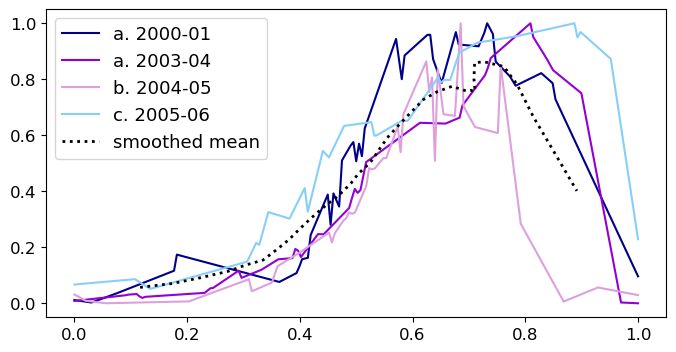

In [167]:
#plt.figure(figsize=(9,3.5))
#plt.figure(figsize=(8,5))
plt.figure(figsize=(8,4))
plt.plot(df2000_2001['time_norm'],df2000_2001['area_norm'],linewidth =1.5,c='darkblue',label='a. 2000-01') #add
plt.plot(df2003_2004['time_norm'],df2003_2004['area_norm'],linewidth =1.5,c='darkviolet',label='a. 2003-04')
plt.plot(df2004_2005['time_norm'],df2004_2005['area_norm'],linewidth =1.5,c='plum',label='b. 2004-05')
plt.plot(df2005_2006['time_norm'],df2005_2006['area_norm'],linewidth =1.5,c='lightskyblue',label='c. 2005-06')

#plt.plot(avg_norm['meantime'],avg_norm['meanarea'],linewidth =3,c='k',linestyle=':',label='smoothed average')
plt.plot(avg_norm['smoothtime'],avg_norm['smootharea'],linewidth =2,c='k',linestyle=':',label='smoothed mean')

plt.legend(fontsize=13);plt.xticks(fontsize=12);plt.yticks(fontsize=12)
#plt.ylabel('Normalized polynya area',fontsize=12);plt.xlabel('Normalized days since polynya opening',fontsize=12)
#plt.show()

#plt.savefig('polynya_norm_add_elong.png', format='png', dpi=400)

## 3 visible insets

### 1. 2000-01

In [28]:
max_0001

# max area is on 2004-02-15

,index,west,east,mid,other,total,uwest,ueast,umid,uother,...,lmid,lother,ltotal,pixelwidth,pixelheight,Date,time_diff,change,days,change_rate
232,0,1.032214,20.175095,2.439779,3.552714e-15,23.647088,1.407565,22.145686,3.284318,0.093838,...,1.970591,0.0,21.676498,0.37839,0.247992,2001-02-02,-2 days,0.901624,-2,-0.450812


In [31]:
# Make list of all MOD09 files in folder
MODfiles = glob('../polynyatimeseries/20010202/MOD09.A2001033.1625.006.2015139215211.hdf')  #this one is used for area calc

# Open first MODIS file and extract temperature, lats, lons
mod09 = SD(MODfiles[0], SDC.READ)   
B1 = (mod09.select('250m Surface Reflectance Band 1')[:])
#B31 = (mod09.select('BAND31')[:]/100)-273.15
lat = mod09.select('Latitude')[:]
lon = mod09.select('Longitude')[:]

# upsample 1 km lat, lon to 250 m - to match resolution of visible bands
lat250,lon250 = scipy.ndimage.zoom(lat, 4, order=1),scipy.ndimage.zoom(lon, 4, order=1)

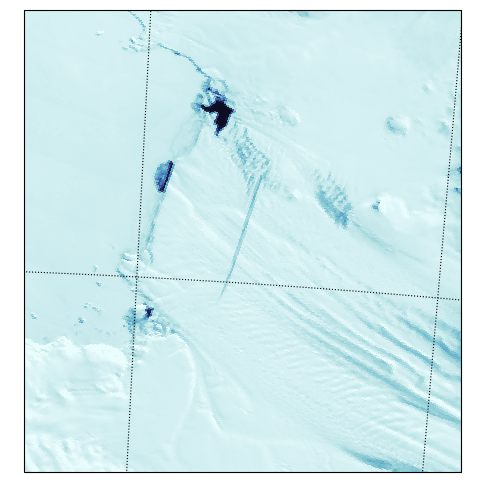

In [32]:
# Plot
llcrnrlat=-75.3;urcrnrlat=-74.55;llcrnrlon=-102.7;urcrnrlon=-100 

fig,ax = plt.subplots(figsize=(6,6)) # give two axes 

plt.axis('off')
m = plt.axes(projection=ccrs.SouthPolarStereo(central_longitude=-105.0))
m.set_extent([llcrnrlon, urcrnrlon, llcrnrlat, urcrnrlat], ccrs.PlateCarree())
gl = m.gridlines(draw_labels=True,xlocs=[-110,-108,-106,-104,-102,-100],ylocs=[-75.5,-75,-74.5,-74,-73,-72,-71],y_inline=False,color='k',linestyle=':')
gl.bottom_labels = gl.right_labels = gl.top_labels = gl.left_labels =  False

data = m.pcolormesh(lon250,lat250,B1,transform=ccrs.PlateCarree(),cmap=cmocean.cm.ice,vmin=0,vmax=10000)
#data = m.pcolormesh(lon,lat,B31,transform=ccrs.PlateCarree(),cmap=cmocean.cm.thermal,vmin=-30,vmax=0)

#cb = plt.colorbar(data,fraction=0.045,pad=0.025,orientation='horizontal')#,shrink=0.84)
#plt.savefig('max20010202.png', format='png',  bbox_inches="tight",dpi=400)

#plt.tight_layout()

### 1. 2003-04

In [129]:
max_0304

# max area is on 2004-02-15

,index,west,east,mid,other,total,uwest,ueast,umid,uother,...,pixelwidth,pixelheight,Date,time_diff,change,days,change_rate,area_norm,days_since_open,time_norm
186,0,90.773808,0.484311,3.113431,0.345937,94.717487,92.503492,0.761061,3.943679,0.345937,...,0.278684,0.248264,2004-02-15,-1 days,4.631884,-1,-4.631884,1.0,161 days,0.809045


In [133]:
# Make list of all MOD09 files in folder
MODfiles = glob('../polynyatimeseries/20040215/MYD09.A2004046.2300.061.2020118073256.hdf')  #this one is used for area calc

# Open first MODIS file and extract temperature, lats, lons
mod09 = SD(MODfiles[0], SDC.READ)   
B1 = (mod09.select('250m Surface Reflectance Band 1')[:])
#B31 = (mod09.select('BAND31')[:]/100)-273.15
lat = mod09.select('Latitude')[:]
lon = mod09.select('Longitude')[:]

# upsample 1 km lat, lon to 250 m - to match resolution of visible bands
lat250,lon250 = scipy.ndimage.zoom(lat, 4, order=1),scipy.ndimage.zoom(lon, 4, order=1)

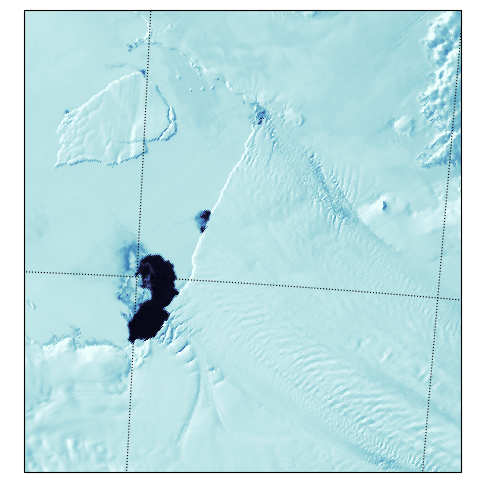

In [135]:
# Plot
llcrnrlat=-75.3;urcrnrlat=-74.55;llcrnrlon=-102.7;urcrnrlon=-100 

fig,ax = plt.subplots(figsize=(6,6)) # give two axes 

plt.axis('off')
m = plt.axes(projection=ccrs.SouthPolarStereo(central_longitude=-105.0))
m.set_extent([llcrnrlon, urcrnrlon, llcrnrlat, urcrnrlat], ccrs.PlateCarree())
gl = m.gridlines(draw_labels=True,xlocs=[-110,-108,-106,-104,-102,-100],ylocs=[-75.5,-75,-74.5,-74,-73,-72,-71],y_inline=False,color='k',linestyle=':')
gl.bottom_labels = gl.right_labels = gl.top_labels = gl.left_labels =  False

data = m.pcolormesh(lon250,lat250,B1,transform=ccrs.PlateCarree(),cmap=cmocean.cm.ice,vmin=0,vmax=10000)
#data = m.pcolormesh(lon,lat,B31,transform=ccrs.PlateCarree(),cmap=cmocean.cm.thermal,vmin=-30,vmax=0)

#cb = plt.colorbar(data,fraction=0.045,pad=0.025,orientation='horizontal')#,shrink=0.84)
plt.savefig('max20040215.png', format='png',  bbox_inches="tight",dpi=400)

#plt.tight_layout()

### 2. 2004-05

In [136]:
max_0405

# max area is on 2005-02-03

,index,west,east,mid,other,total,uwest,ueast,umid,uother,...,lmid,lother,ltotal,pixelwidth,pixelheight,Date,time_diff,change,days,change_rate
146,0,27.170073,8.657131,6.326365,30.832706,72.986276,31.631826,9.789218,6.992298,162.62088,...,5.793619,10.188778,46.615322,0.266727,0.249669,2005-02-03,-1 days,21.597454,-1,-21.597454


In [137]:
# Make list of all MOD09 files in folder
MODfiles = glob('../polynyatimeseries/20050203/MYD09.A2005034.2245.006.2015099165632.hdf')  #this one is used for area calc

# Open first MODIS file and extract temperature, lats, lons
mod09 = SD(MODfiles[0], SDC.READ)   
B1 = (mod09.select('250m Surface Reflectance Band 1')[:])
#B31 = (mod09.select('BAND31')[:]/100)-273.15
lat = mod09.select('Latitude')[:]
lon = mod09.select('Longitude')[:]

# upsample 1 km lat, lon to 250 m - to match resolution of visible bands
lat250,lon250 = scipy.ndimage.zoom(lat, 4, order=1),scipy.ndimage.zoom(lon, 4, order=1)

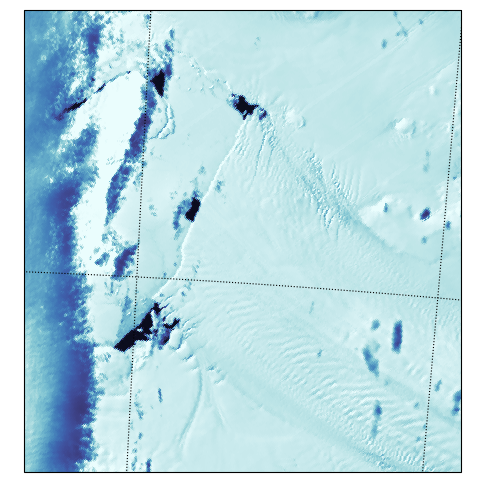

In [138]:
# Plot
llcrnrlat=-75.3;urcrnrlat=-74.55;llcrnrlon=-102.7;urcrnrlon=-100 

fig,ax = plt.subplots(figsize=(6,6)) # give two axes 

plt.axis('off')
m = plt.axes(projection=ccrs.SouthPolarStereo(central_longitude=-105.0))
m.set_extent([llcrnrlon, urcrnrlon, llcrnrlat, urcrnrlat], ccrs.PlateCarree())
gl = m.gridlines(draw_labels=True,xlocs=[-110,-108,-106,-104,-102,-100],ylocs=[-75.5,-75,-74.5,-74,-73,-72,-71],y_inline=False,color='k',linestyle=':')
gl.bottom_labels = gl.right_labels = gl.top_labels = gl.left_labels =  False

data = m.pcolormesh(lon250,lat250,B1,transform=ccrs.PlateCarree(),cmap=cmocean.cm.ice,vmin=0,vmax=10000)
#data = m.pcolormesh(lon,lat,B31,transform=ccrs.PlateCarree(),cmap=cmocean.cm.thermal,vmin=-30,vmax=0)

#cb = plt.colorbar(data,fraction=0.045,pad=0.025,orientation='horizontal')#,shrink=0.84)
plt.savefig('max20050203.png', format='png',  bbox_inches="tight",dpi=400)

#plt.tight_layout()

### 3. 2005-06

In [139]:
max_0506

# max area is on 2006-02-28

,index,west,east,mid,other,total,uwest,ueast,umid,uother,...,lmid,lother,ltotal,pixelwidth,pixelheight,Date,time_diff,change,days,change_rate
112,0,13.042029,79.729843,16.447091,52.810581,162.029545,14.905176,83.841616,17.475034,57.243586,...,15.097916,48.12059,149.694226,0.257899,0.249114,2006-02-28,-1 days,8.169607,-1,-8.169607


In [140]:
# Make list of all MOD09 files in folder
MODfiles = glob('../polynyatimeseries/20060228/MOD09.A2006059.1500.006.2015113190023.hdf')  #this one is used for area calc

# Open first MODIS file and extract temperature, lats, lons
mod09 = SD(MODfiles[0], SDC.READ)   
B1 = (mod09.select('250m Surface Reflectance Band 1')[:])
#B31 = (mod09.select('BAND31')[:]/100)-273.15
lat = mod09.select('Latitude')[:]
lon = mod09.select('Longitude')[:]

# upsample 1 km lat, lon to 250 m - to match resolution of visible bands
lat250,lon250 = scipy.ndimage.zoom(lat, 4, order=1),scipy.ndimage.zoom(lon, 4, order=1)

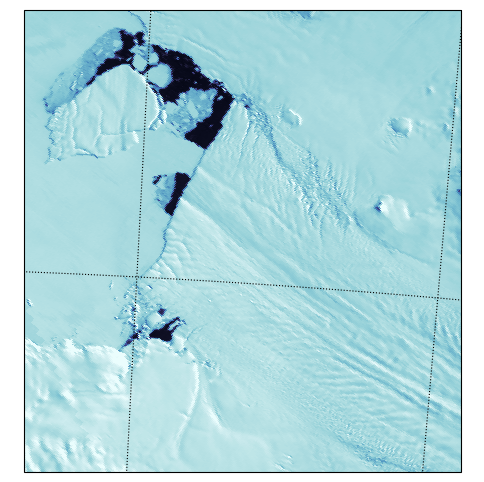

In [141]:
# Plot
llcrnrlat=-75.3;urcrnrlat=-74.55;llcrnrlon=-102.7;urcrnrlon=-100 

fig,ax = plt.subplots(figsize=(6,6)) # give two axes 

plt.axis('off')
m = plt.axes(projection=ccrs.SouthPolarStereo(central_longitude=-105.0))
m.set_extent([llcrnrlon, urcrnrlon, llcrnrlat, urcrnrlat], ccrs.PlateCarree())
gl = m.gridlines(draw_labels=True,xlocs=[-110,-108,-106,-104,-102,-100],ylocs=[-75.5,-75,-74.5,-74,-73,-72,-71],y_inline=False,color='k',linestyle=':')
gl.bottom_labels = gl.right_labels = gl.top_labels = gl.left_labels =  False

data = m.pcolormesh(lon250,lat250,B1,transform=ccrs.PlateCarree(),cmap=cmocean.cm.ice,vmin=0,vmax=10000)
#data = m.pcolormesh(lon,lat,B31,transform=ccrs.PlateCarree(),cmap=cmocean.cm.thermal,vmin=-30,vmax=0)

#cb = plt.colorbar(data,fraction=0.045,pad=0.025,orientation='horizontal')#,shrink=0.84)
plt.savefig('max20060228.png', format='png',  bbox_inches="tight",dpi=400)

#plt.tight_layout()

## Check this:

In [185]:
# Make list of all MOD09 files in folder
MODfiles = glob('../polynyatimeseries/20060321/MOD09.A2006080.1655.006.2015114225132.hdf')  #this one is used for area calc

# Open first MODIS file and extract temperature, lats, lons
mod09 = SD(MODfiles[0], SDC.READ)   
B1 = (mod09.select('250m Surface Reflectance Band 1')[:])
#B31 = (mod09.select('BAND31')[:]/100)-273.15
lat = mod09.select('Latitude')[:]
lon = mod09.select('Longitude')[:]

# upsample 1 km lat, lon to 250 m - to match resolution of visible bands
lat250,lon250 = scipy.ndimage.zoom(lat, 4, order=1),scipy.ndimage.zoom(lon, 4, order=1)

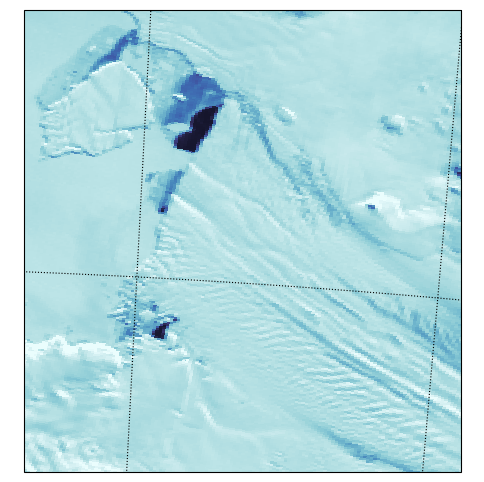

In [186]:
# Plot
llcrnrlat=-75.3;urcrnrlat=-74.55;llcrnrlon=-102.7;urcrnrlon=-100 

fig,ax = plt.subplots(figsize=(6,6)) # give two axes 

plt.axis('off')
m = plt.axes(projection=ccrs.SouthPolarStereo(central_longitude=-105.0))
m.set_extent([llcrnrlon, urcrnrlon, llcrnrlat, urcrnrlat], ccrs.PlateCarree())
gl = m.gridlines(draw_labels=True,xlocs=[-110,-108,-106,-104,-102,-100],ylocs=[-75.5,-75,-74.5,-74,-73,-72,-71],y_inline=False,color='k',linestyle=':')
gl.bottom_labels = gl.right_labels = gl.top_labels = gl.left_labels =  False

data = m.pcolormesh(lon250,lat250,B1,transform=ccrs.PlateCarree(),cmap=cmocean.cm.ice,vmin=0,vmax=10000)
#data = m.pcolormesh(lon,lat,B31,transform=ccrs.PlateCarree(),cmap=cmocean.cm.thermal,vmin=-30,vmax=0)

#cb = plt.colorbar(data,fraction=0.045,pad=0.025,orientation='horizontal')#,shrink=0.84)
#plt.savefig('max20060228.png', format='png',  bbox_inches="tight",dpi=400)

#plt.tight_layout()

## Save all panels and make fig in ppt (screenshot below)
insets are visible MODIS images on days of maximum polynya area (grey arrow).

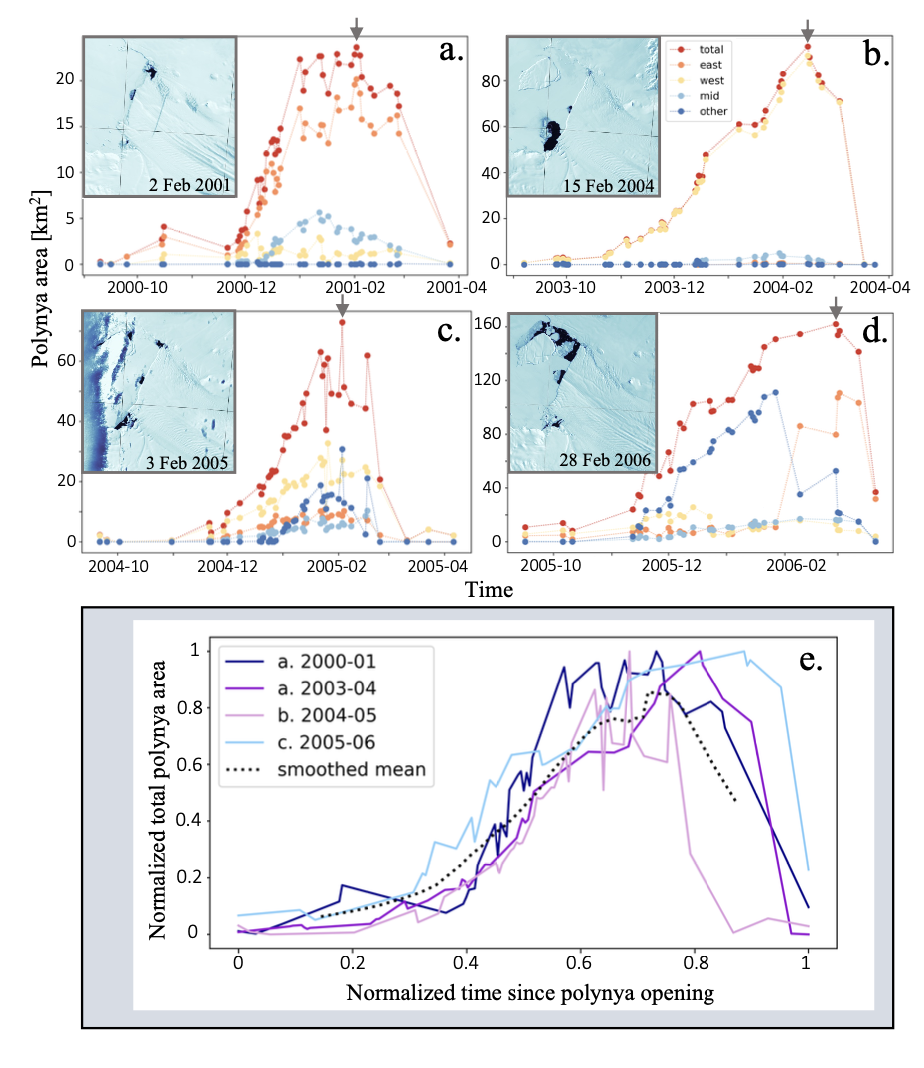

In [168]:
pwd

'/Users/elenasavidge/Documents/Documents - Elena’s MacBook Pro/PhD_Ch2/manuscriptcode_2'